In [18]:
from keras import layers, models
from tfreplknet import RepLKNetB224In1k, preprocess_input_bl

inputs = layers.Input(shape=(224, 224, 3), dtype='uint8')
outputs = layers.Lambda(preprocess_input_bl)(inputs)
outputs = RepLKNetB224In1k(include_top=False)(outputs)
outputs = layers.Dense(1, activation='sigmoid')(outputs)
model = models.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 lambda_4 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 replknet_b_224_in1k (Functi  (None, None, None, 1024)  79114112 
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 7, 7, 1)           1025      
                                                                 
Total params: 79,115,137
Trainable params: 78,840,193
Non-trainable params: 274,944
_________________________________________________________________


In [ ]:
# I have an input of shape (360, 256, 2)

In [19]:
# For each BatchNormalization layer in model.layers[-2].layers, set the momentum to 0.999
for layer in model.layers[-2].layers:
    if isinstance(layer, layers.BatchNormalization):
        layer.momentum = 0.999

(array([4., 7., 5., 3., 2., 6., 3., 9., 5., 5.]),
 array([3.3668001e-04, 8.4048055e-02, 1.6775943e-01, 2.5147080e-01,
        3.3518219e-01, 4.1889358e-01, 5.0260496e-01, 5.8631629e-01,
        6.7002767e-01, 7.5373906e-01, 8.3745044e-01], dtype=float32),
 <BarContainer object of 10 artists>)

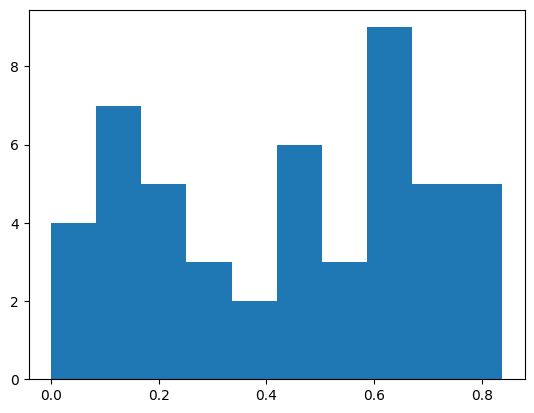

In [47]:
import tensorflow as tf
# GEnerate random number between 0 and 255 for each pixel in (1, 360, 360, 2)
x = tf.random.uniform((1, 224, 224, 3), minval=0, maxval=20055, dtype=tf.dtypes.int32)
y = model(x).numpy().flatten()
import matplotlib.pyplot as plt
plt.hist(y)
